In [1]:
#magic command
%matplotlib inline
#dependendcies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [11]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [12]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [15]:
sum(city_data_df["type"]=="Rural")

18

In [16]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [17]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [18]:
pyber_data_df = pd.merge(ride_data_df,city_data_df,how = "left",on=["city","city"])

In [20]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [23]:
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [24]:
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]

In [25]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [29]:
#getting the number of rides in urban cities
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [30]:
#getting the number of rides in suburban and rural cities
suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]

In [31]:
#getting average fare for each type of city
urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [32]:
#getting average driver for each type of city
urban_avg_driver_count = urban_cities_df.groupby("city").mean()["driver_count"]
suburban_avg_driver_count = suburban_cities_df.groupby("city").mean()["driver_count"]
rural_avg_driver_count = rural_cities_df.groupby("city").mean()["driver_count"]
urban_avg_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

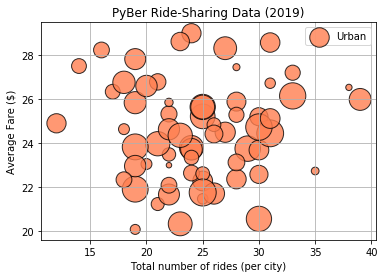

In [45]:
#scatter plot for urban citites


plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total number of rides (per city)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
#adding legend
plt.legend()

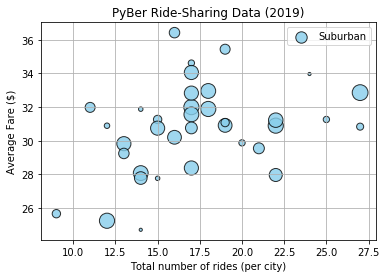

In [46]:
#scatter plot for Suburban citites
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_avg_driver_count,c="skyblue",
            edgecolor="black",linewidth=1,alpha=0.8,label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total number of rides (per city)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
#adding legend
plt.legend()

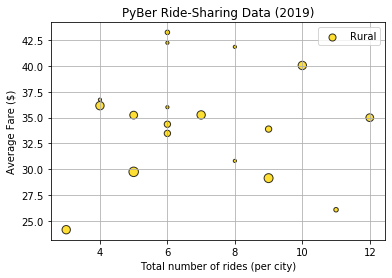

In [47]:
#scatter plot for rural citites
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_avg_driver_count,c="gold",
            edgecolor="black",linewidth=1,alpha=0.8,label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total number of rides (per city)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
#adding legend
plt.legend()

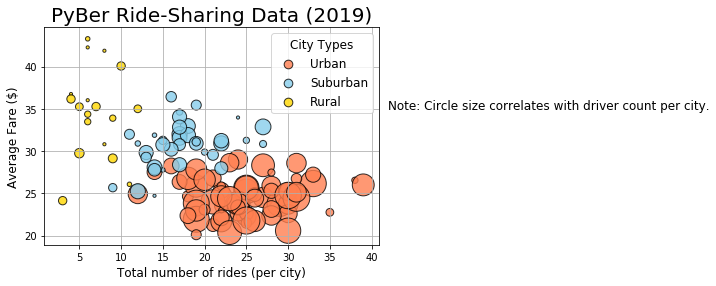

In [55]:
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_avg_driver_count,c="coral",
            edgecolor="black",linewidth=1,alpha=0.8,label = "Urban")
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_avg_driver_count,c="skyblue",
            edgecolor="black",linewidth=1,alpha=0.8,label = "Suburban")

plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_avg_driver_count,c="gold",
            edgecolor="black",linewidth=1,alpha=0.8,label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)",fontsize = 20)
plt.xlabel("Total number of rides (per city)",fontsize = 12)
plt.ylabel("Average Fare ($)",fontsize = 12)
plt.grid(True)
#adding legend
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("Resources/Fig1.png")
plt.show()

In [58]:
#summary of statistics
urban_cities_df.describe()


,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [63]:
rural_ride_count.describe()


count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [65]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.0, 17.36, 6.94)

In [73]:
suburban_ride_count.mode()

0    17
dtype: int64

In [68]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [69]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [75]:
median_rural_ride_count = sts.mode(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

The median for the ride counts for urban trips is ModeResult(mode=array([6]), count=array([5])).


In [77]:
#urban fares
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [78]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")



The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [82]:
suburban_fares = suburban_cities_df["fare"]
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

The mean fare price for suburban trips is $30.97.


In [81]:
rural_fares = rural_cities_df["fare"]
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

The mean fare price for rural trips is $34.62.


In [84]:
#coutinig drivers in urban cities
urban_drivers= urban_cities_df["driver_count"]
urban_drivers.head()
urban_drivers_average = urban_drivers.mean()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [87]:
#coutinig drivers in suburban cities
suburban_drivers= suburban_cities_df["driver_count"]
suburban_drivers_average=suburban_drivers.mean()

In [88]:
#coutinig drivers in rural cities
rural_drivers= rural_cities_df["driver_count"]
rural_drivers_average=rural_drivers.mean()

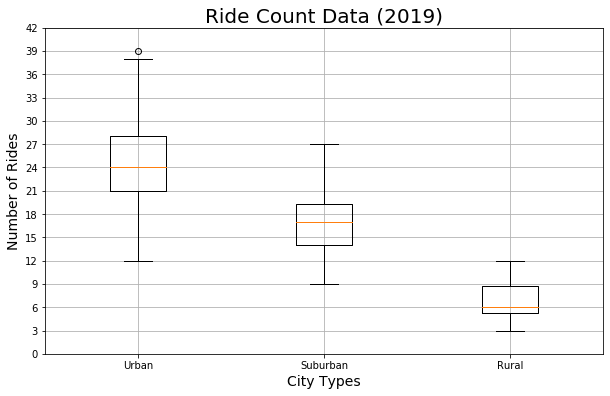

In [97]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Resources/Fig2.png")
plt.show()

In [99]:
#getting the city which has 39 ride counts
urban_ride_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_ride_outlier} has the highest ride count")

West Angela has the highest ride count


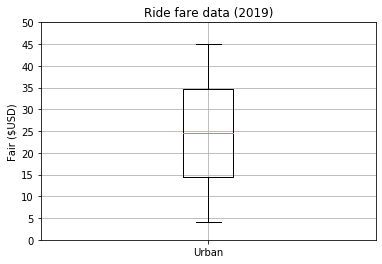

Summary statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [111]:
#crreating box and whisker for urban fair data
x_labels = ["Urban"]
fig,ax = plt.subplots()
ax.boxplot(urban_fares,labels=x_labels)
ax.set_title("Ride fare data (2019)")
ax.set_ylabel("Fair ($USD)")
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
plt.show()
print("Summary statistics")
urban_fares.describe()

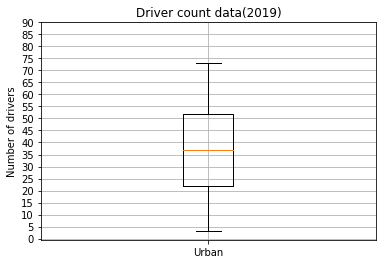

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [122]:
#creating box and whisker for urban driver count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
ax.set_title("Driver count data(2019)")
ax.set_ylabel("Number of drivers")
ax.set_yticks(np.arange(0,91,step=5))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [127]:
#creating sums of fares
sum_fare_type = pyber_data_df.groupby("type").sum()["fare"]
sum_fare_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [129]:
total_fare = pyber_data_df["fare"].sum()
total_fare

63538.64

In [131]:
type_percent = sum_fare_type/total_fare*100
type_percent

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

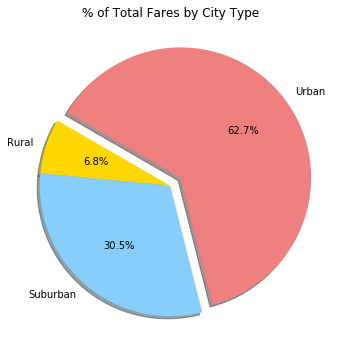

In [142]:
#import matplotlib
import matplotlib as mpl
plt.subplots(figsize=(10, 6))
plt.pie(type_percent,labels=["Rural","Suburban","Urban"],colors=["gold", "lightskyblue", "lightcoral"],
       explode=(0,0,0.1),autopct= "%1.1f%%",shadow = True, startangle = 150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Resources/Fig5.png")
plt.show()